# Appendix

# Rain in Australia

### Jose Luis Estrada and Dallin Munger

The Rain in Australia dataset contains about ten years (November 2007- June 2017) of daily weather observations from many locations across Australia. This project aims to predict the target variable “Rain Tomorrow,” which means whether it rained the following day or not. Predictions will be made through different data mining processes/machine learning algorithms and select the algorithms' best predictor. The dataset was acquired through Kaggle.com in March 2021.

### Import packages, dataset and describe characteristics of dataframe

In [1]:
#Import packages to manipulate dataset, visualizations, and data mining processes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as spstats
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
#Import dataset with Australia's weather data
australia = pd.read_csv("weatherAUS.csv")
australia.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
#Print dimension of australia dataframe
australia.shape

(145460, 23)

In [4]:
#Print type of variables of each column
australia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### Cleaning, wrangling, and handling missing data

Each variable is revised to find which of these has a more significant amount of missing data. Those variables are eliminated to input data into analytical process, visualizations, and data mining/machine learning processes. Variables missing fewer data (<~10%) will replace their missing cells with the same variable median.

In [5]:
#Check percentage of missing data per variable
australia.isnull().sum()/len(australia)

Date             0.000000
Location         0.000000
MinTemp          0.010209
MaxTemp          0.008669
Rainfall         0.022419
Evaporation      0.431665
Sunshine         0.480098
WindGustDir      0.070989
WindGustSpeed    0.070555
WindDir9am       0.072639
WindDir3pm       0.029066
WindSpeed9am     0.012148
WindSpeed3pm     0.021050
Humidity9am      0.018246
Humidity3pm      0.030984
Pressure9am      0.103568
Pressure3pm      0.103314
Cloud9am         0.384216
Cloud3pm         0.408071
Temp9am          0.012148
Temp3pm          0.024811
RainToday        0.022419
RainTomorrow     0.022460
dtype: float64

In [6]:
#Drop variables that are missing larger amount of data 
#Variables are missing more than 15% of data
australia.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], inplace = True, axis = 1)

#Replace missing cells with the median of each variable for numeric variables
australia['MinTemp'].fillna((australia['MinTemp'].median()), inplace=True)
australia['MaxTemp'].fillna((australia['MaxTemp'].median()), inplace=True)
australia['Rainfall'].fillna((australia['Rainfall'].median()), inplace=True)
australia['WindGustSpeed'].fillna((australia['WindGustSpeed'].median()), inplace=True)
australia['WindSpeed9am'].fillna((australia['WindSpeed9am'].median()), inplace=True)
australia['WindSpeed3pm'].fillna((australia['WindSpeed3pm'].median()), inplace=True)
australia['Humidity9am'].fillna((australia['Humidity9am'].median()), inplace=True)
australia['Humidity3pm'].fillna((australia['Humidity3pm'].median()), inplace=True)
australia['Pressure9am'].fillna((australia['Pressure9am'].median()), inplace=True)
australia['Pressure3pm'].fillna((australia['Pressure3pm'].median()), inplace=True)
australia['Temp9am'].fillna((australia['Temp9am'].median()), inplace=True)
australia['Temp3pm'].fillna((australia['Temp3pm'].median()), inplace=True)

#Eliminate missing rows with missing values for categorical variables
australia.dropna(subset=['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'], inplace=True)

In [7]:
australia.shape

(123710, 19)

### Data exploration for categorial variables

WindGustDir      E   ENE   ESE     N    NE   NNE   NNW    NW     S    SE  \
RainTomorrow                                                               
No            7237  6267  5715  5988  5288  4536  4246  5233  6537  7159   
Yes           1267  1184  1111  2253  1198  1393  1729  2130  1871  1649   

WindGustDir    SSE   SSW    SW     W   WNW   WSW  
RainTomorrow                                      
No            6852  6301  6577  6698  5340  6344  
Yes           1634  1772  1638  2479  2129  1955  
WindDir9am       E   ENE   ESE     N    NE   NNE   NNW    NW     S    SE  \
RainTomorrow                                                               
No            7353  6119  6202  7479  5509  5567  5153  5365  6509  7184   
Yes           1212  1280  1039  3284  1443  2021  2222  2045  1548  1272   

WindDir9am     SSE   SSW    SW     W   WNW   WSW  
RainTomorrow                                      
No            7119  5547  5903  5476  4947  4886  
Yes           1532  1504  1717  1

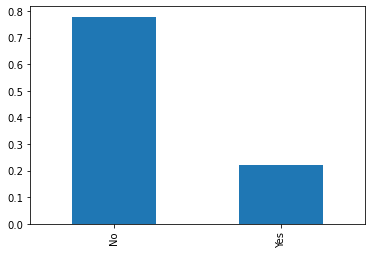

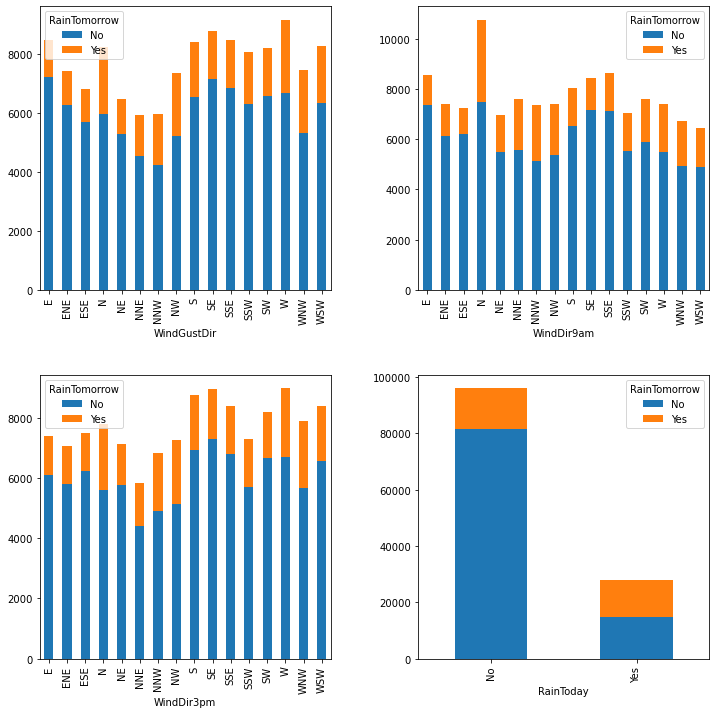

In [8]:
#View the distribution of the categorical variables (WindGustDir, WindDir9am, WindDir3pm, RainToday, RainTomorrow) using stacked bar plot
#Create function
def create_tables(cat_variable, pos1, pos2):
    table = pd.crosstab(australia[cat_variable], australia['RainTomorrow'])
    table.plot(kind = 'bar', stacked = True, ax = axes[pos1, pos2])
    print(table.T)

def create_tables_normalized(cat_variable, pos1, pos2):
    table = pd.crosstab(australia[cat_variable], australia['RainTomorrow'])
    table_norm = table.div(table.sum(1), axis = 0)
    table_norm.plot(kind = 'bar', stacked = True, ax = axes[pos1, pos2])
    print(table_norm.T)

#First print bar plot of response and percentage of each response, then original overlay
australia['RainTomorrow'].value_counts(normalize = True).plot(kind = 'bar')

figure, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 12))
create_tables('WindGustDir', 0, 0)
create_tables('WindDir9am', 0, 1)
create_tables('WindDir3pm', 1, 0)
create_tables('RainToday', 1, 1)  

plt.subplots_adjust(wspace=0.3, hspace=0.3)

WindGustDir          E       ENE      ESE         N        NE       NNE  \
RainTomorrow                                                              
No            0.851011  0.841095  0.83724  0.726611  0.815294  0.765053   
Yes           0.148989  0.158905  0.16276  0.273389  0.184706  0.234947   

WindGustDir        NNW        NW         S        SE       SSE       SSW  \
RainTomorrow                                                               
No            0.710628  0.710716  0.777474  0.812784  0.807448  0.780503   
Yes           0.289372  0.289284  0.222526  0.187216  0.192552  0.219497   

WindGustDir         SW         W       WNW       WSW  
RainTomorrow                                          
No            0.800609  0.729868  0.714955  0.764429  
Yes           0.199391  0.270132  0.285045  0.235571  
WindDir9am           E       ENE       ESE         N        NE       NNE  \
RainTomorrow                                                               
No            0.858494

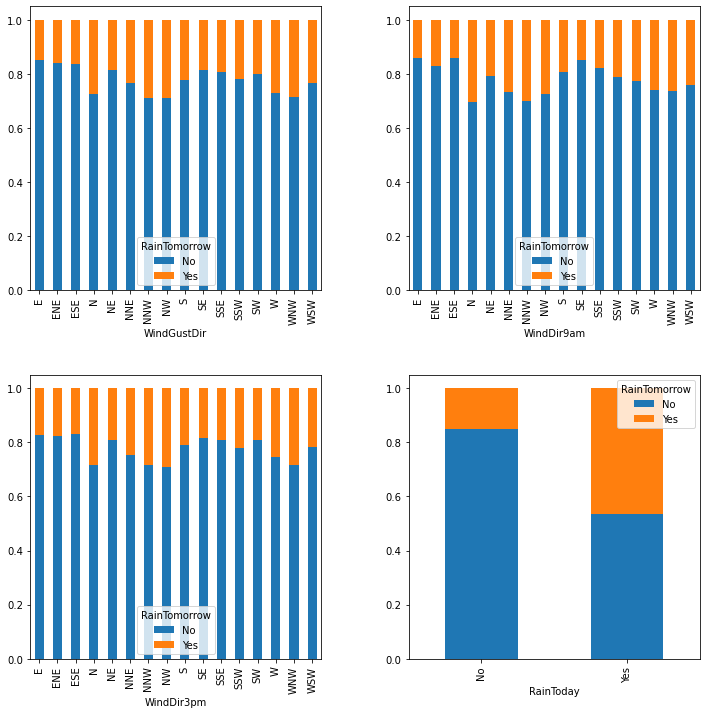

In [9]:
#Plot stacked bars for each categorical variable (normalized)
figure, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 12))
create_tables_normalized('WindGustDir', 0, 0)
create_tables_normalized('WindDir9am', 0, 1)
create_tables_normalized('WindDir3pm', 1, 0)
create_tables_normalized('RainToday', 1, 1)  

plt.subplots_adjust(wspace=0.3, hspace=0.3)

RainToday looks like it could be a strong predictor of RainTomorrow. All the other categorical variables are similarly distributed between Yes and No across all values when compared to the actual distribution of RainTomorrow.

### Data exploration for numeric variables
(MinTemp, MaxTemp, Rainfall, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Temp9am, Temp3pm)

In [10]:
#Now explore numeric variables - first get summary statistics for each variable
australia[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
          'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']].describe()


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000
mean,12.413776,23.474582,2.375661,40.685280,15.011689,19.174578,67.673470,50.862574,1017.413025,1015.025408,17.268054,21.891956
std,6.366799,7.205915,8.528039,13.388636,8.307285,8.571039,18.976358,20.839815,6.765576,6.703695,6.477935,7.006134
min,-8.500000,-4.800000,0.000000,7.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,-7.200000,-5.400000
25%,7.800000,18.100000,0.000000,31.000000,9.000000,13.000000,56.000000,36.000000,1013.200000,1010.700000,12.500000,16.800000
50%,12.200000,23.000000,0.000000,39.000000,13.000000,19.000000,69.000000,52.000000,1017.600000,1015.200000,16.900000,21.300000
75%,17.000000,28.600000,0.800000,48.000000,20.000000,24.000000,81.000000,65.000000,1021.700000,1019.300000,21.900000,26.700000
max,33.900000,48.100000,367.600000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000


In [11]:
#Calculate point-biserial correlation between response RainTomorrow and all numeric variables
binary_RainTomorrow = australia['RainTomorrow'].replace(to_replace = ['No', 'Yes'], value = [0, 1])
australia_numeric = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
          'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
for i in australia_numeric:
    print([i, spstats.pointbiserialr(binary_RainTomorrow, australia[i])[0]])


['MinTemp', 0.07663243854313308]
['MaxTemp', -0.16844953489963466]
['Rainfall', 0.2408377719897318]
['WindGustSpeed', 0.23654119445449617]
['WindSpeed9am', 0.093531282439093]
['WindSpeed3pm', 0.09602991028621156]
['Humidity9am', 0.27315870313661006]
['Humidity3pm', 0.4517707912188132]
['Pressure9am', -0.23536395076494238]
['Pressure3pm', -0.21559615309421867]
['Temp9am', -0.03639018922205457]
['Temp3pm', -0.2005074688050395]


Humidity3pm has the strongest correlation with RainTomorrow with a correlation of 0.45. However, there are no really strong correlations between the numeric variables and RainTomorrow. 

We'll also look at histograms of each numeric variable with an overlay of RainTomorrow to understand the distribution and relationship between the variables better.

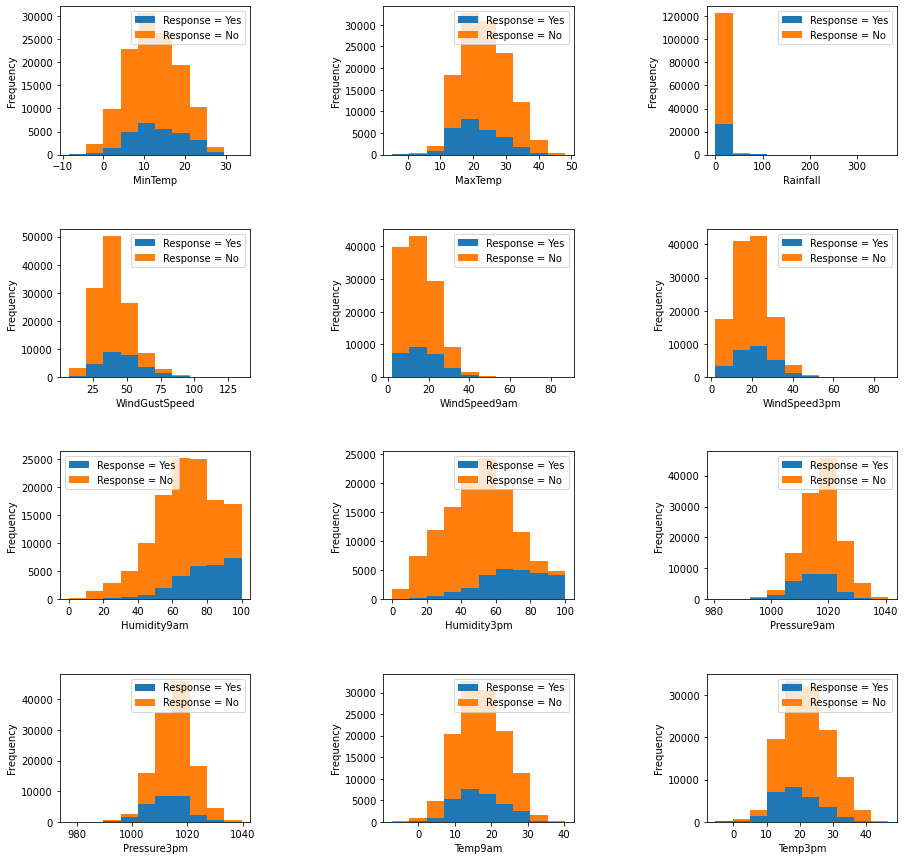

In [12]:
#Create function to plot histograms
def create_hist(num_variable, pos):
    aus_y = australia[australia['RainTomorrow'] == 'Yes'][num_variable]
    aus_n = australia[australia['RainTomorrow'] == 'No'][num_variable]
    plt.subplot(4, 3, pos)
    plt.hist([aus_y, aus_n], stacked = True)
    plt.legend(['Response = Yes', 'Response = No'])
    plt.xlabel(num_variable)
    plt.ylabel('Frequency')
    
plt.figure(figsize = (15, 15))
create_hist('MinTemp', 1)
create_hist('MaxTemp', 2)
create_hist('Rainfall', 3)
create_hist('WindGustSpeed', 4)
create_hist('WindSpeed9am', 5)
create_hist('WindSpeed3pm', 6)
create_hist('Humidity9am', 7)
create_hist('Humidity3pm', 8)
create_hist('Pressure9am', 9)
create_hist('Pressure3pm', 10)
create_hist('Temp9am', 11)
create_hist('Temp3pm', 12)

plt.subplots_adjust(wspace=0.7, hspace=0.5)


### Train and Test Set

The next step is to prepare the data for modeling by dividing it into a training and a test set. The Date and Location variables are first removed from the dataset, and the predictor and response variables separated. Once  the predictors and the response variables have been separated, the data is split into a training set and a test set. The chosen split is a 70/30 split, with 30% of the data being contained in the test set.

In [13]:
#Drop date and location variables to reduce dataframe that includes dummy variables
australia.drop(['Date', 'Location'], inplace = True, axis = 1)

In [14]:
from sklearn.model_selection import train_test_split
#Dropped dependent variable to create dummy variables
X = australia.drop(['RainTomorrow'], axis = 1)
#Add dummy variables for categorical data
X = pd.get_dummies(X)
y = australia['RainTomorrow']
#Segmented dataframe into train and test set. Test set = 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, shuffle = True)

### Logistic Regression

Now that the data has been prepared and split, the models can be fit. For this problem, logistic regression and random forest models are fitted and the results compared.

In [15]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
#Fit the logistic regression model on the training data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#Validate the model by predicting on the test set
y_pred = logreg.predict(X_test)
#Print accuracy
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

#Print confusion matrix and key classification metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.84
[[27450  1407]
 [ 4448  3808]]
              precision    recall  f1-score   support

          No       0.86      0.95      0.90     28857
         Yes       0.73      0.46      0.57      8256

    accuracy                           0.84     37113
   macro avg       0.80      0.71      0.73     37113
weighted avg       0.83      0.84      0.83     37113



The accuracy of the logistic regression model is 0.84, and the precision, recall, and F1 score are all shown as well. Next, a random forest model is fit on the data to compare the two models.

### Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
#Fit the random forest model on the training data with 100 trees using the Gini index for splitting
randfor = RandomForestClassifier(n_estimators = 100, criterion = "gini")

randfor.fit(X_train, y_train)
#Validate the model on the test set
y_pred_randfor = randfor.predict(X_test)
#Print the accuracy of the model
print('Accuracy of random forest classifier on test set: {:.2f}'.format(randfor.score(X_test, y_test)))
#Print the confusion matrix and key classification metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix_randfor = confusion_matrix(y_test, y_pred_randfor)
print(confusion_matrix_randfor)
print(classification_report(y_test, y_pred_randfor))

Accuracy of random forest classifier on test set: 0.85
[[27596  1261]
 [ 4177  4079]]
              precision    recall  f1-score   support

          No       0.87      0.96      0.91     28857
         Yes       0.76      0.49      0.60      8256

    accuracy                           0.85     37113
   macro avg       0.82      0.73      0.76     37113
weighted avg       0.85      0.85      0.84     37113



Based on the accuracy, precision, recall, and F1 score, the random forest model performs slightly better than the logistic regression model. This will be the final model.